In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is a crucial step in understanding your dataset and extracting meaningful insights.

# Descriptive statistics

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Some key information we derive from the table above:

**Price**:

* The average housing price in the dataset is approximately $ 4,766,729.

* The standard deviation is $1,870,440, indicating a considerable spread of prices.

* The median (50th percentile) price is $4,340,000, providing a measure of central tendency.

**Area**:

* The average area of the properties is approximately 5150.54 square units.
* Areas range from 1650 to 16200 square units.
* The standard deviation is 2170.14, suggesting variability in property sizes.
* The median area is 4600 square units, indicating the middle value.

**Bedrooms**:

* The average number of bedrooms is approximately 2.97.
* The number of bedrooms ranges from 1 to 6.
* Most properties have 3 bedrooms, as indicated by the median of 3.

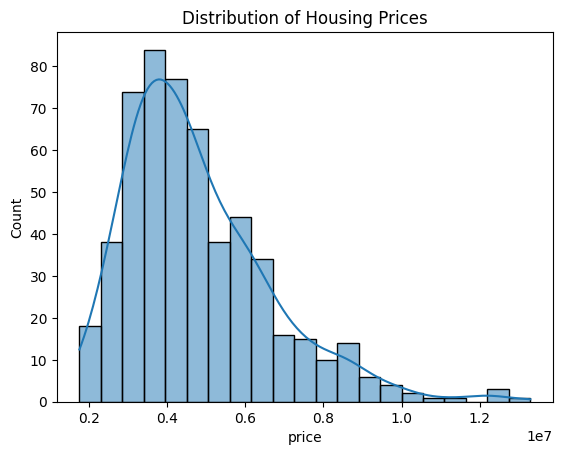

In [7]:
# Distribution of the target variable
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Housing Prices')
plt.show()

## Univariate analysis for numerical features

We are exploring each variable in a data set, separately by looking at the range of values, as well as the central tendency of the values.

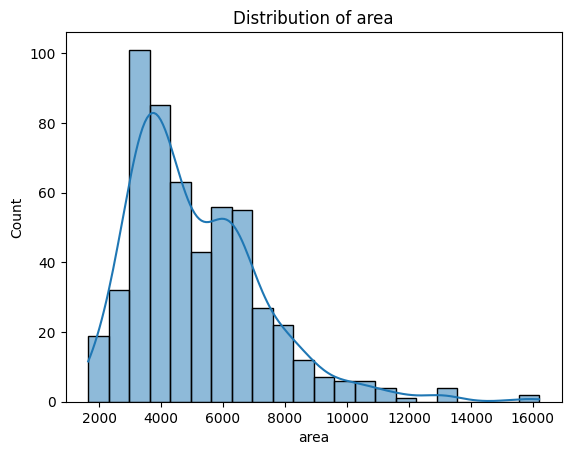

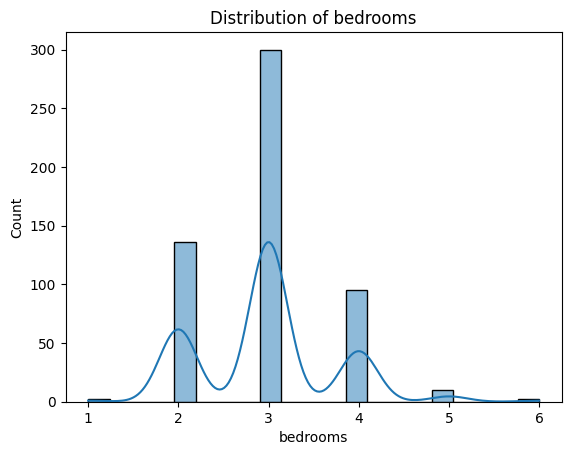

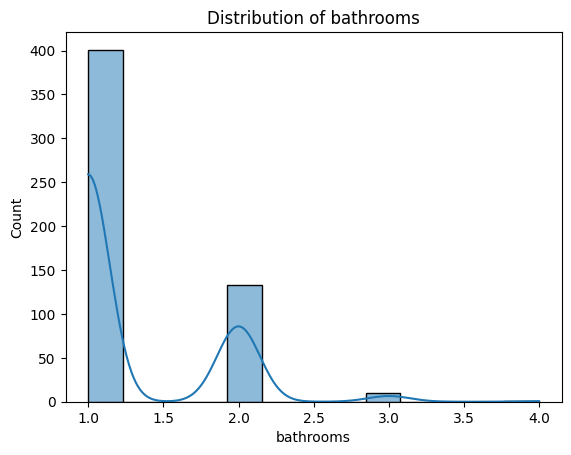

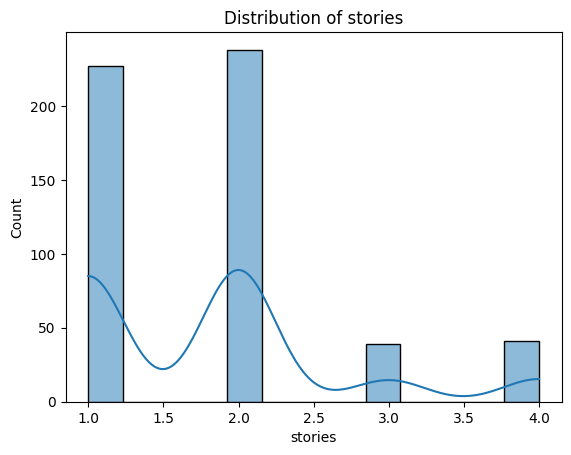

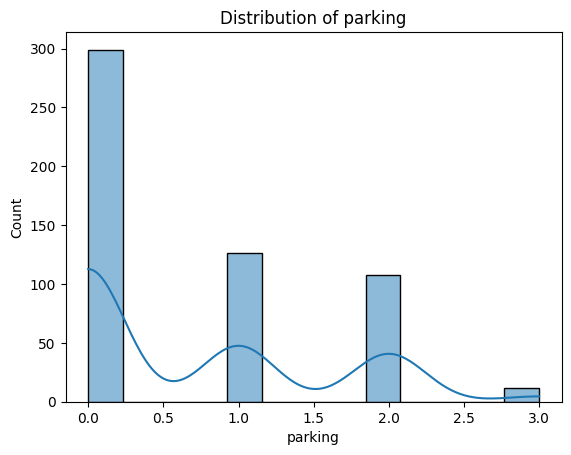

In [8]:
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Univariate analysis for categorical features


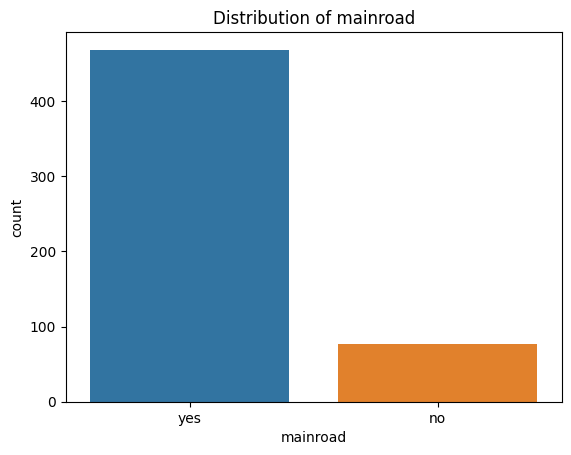

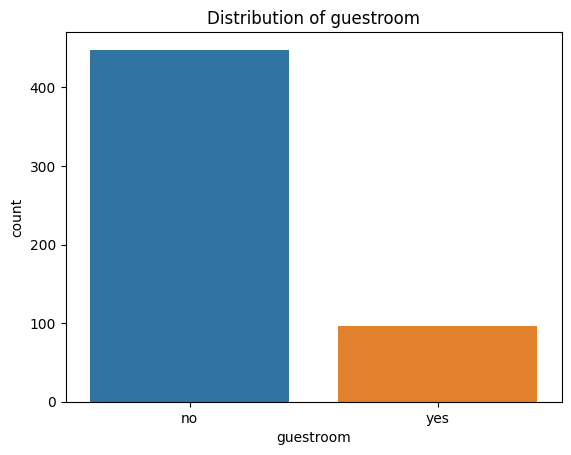

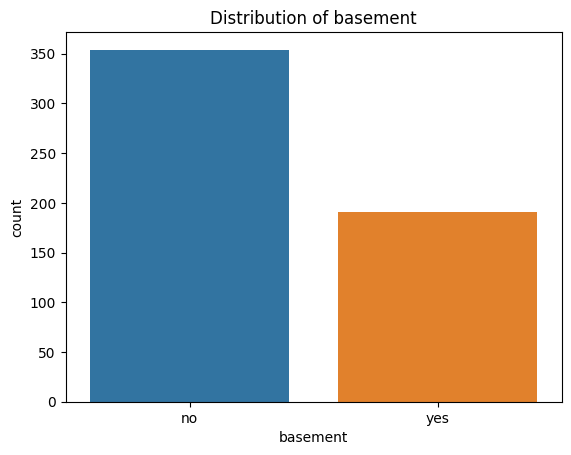

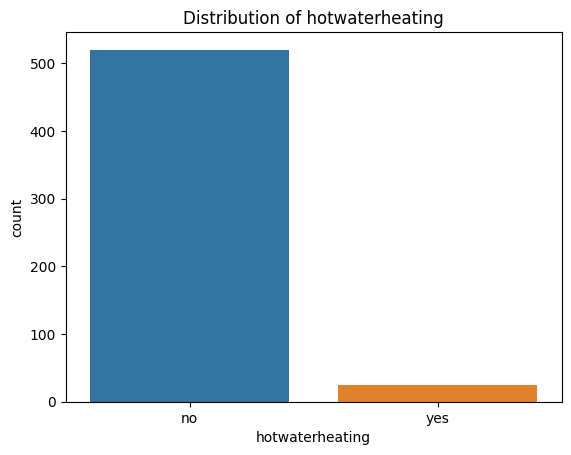

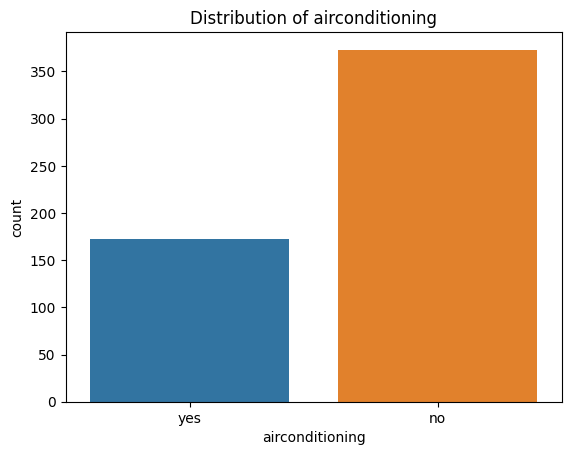

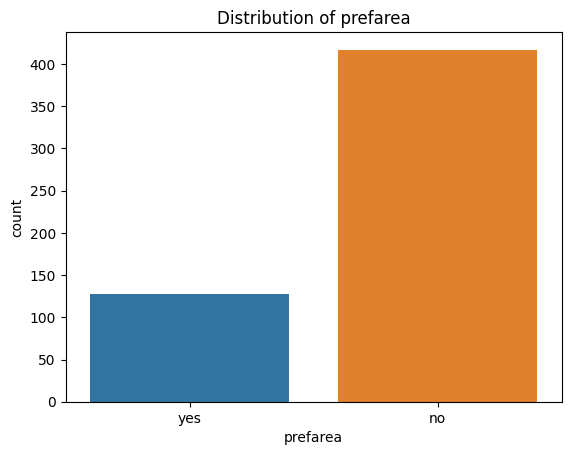

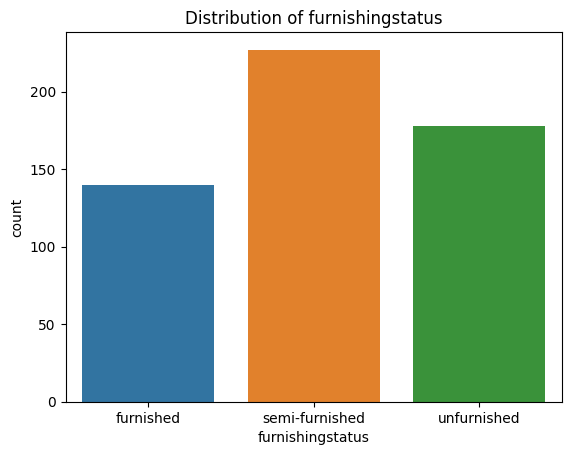

In [9]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Bivariate analysis for numerical features vs. target variable

I conducted this analysis to find out if there is a relationship between the two variables.

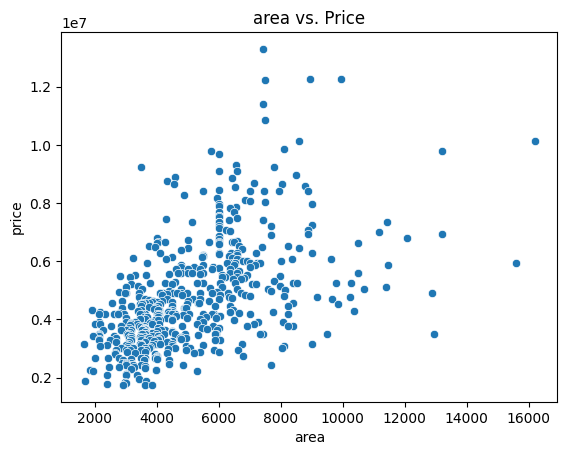

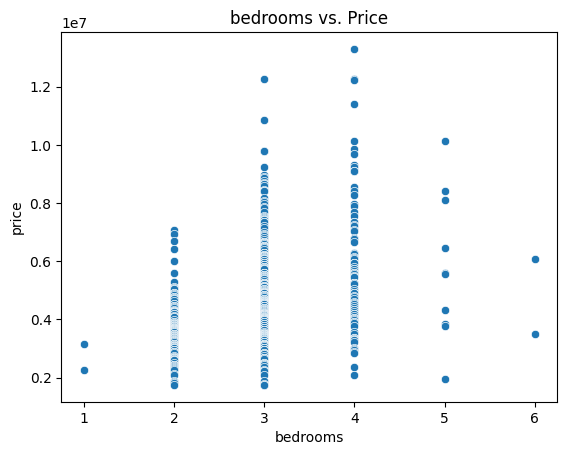

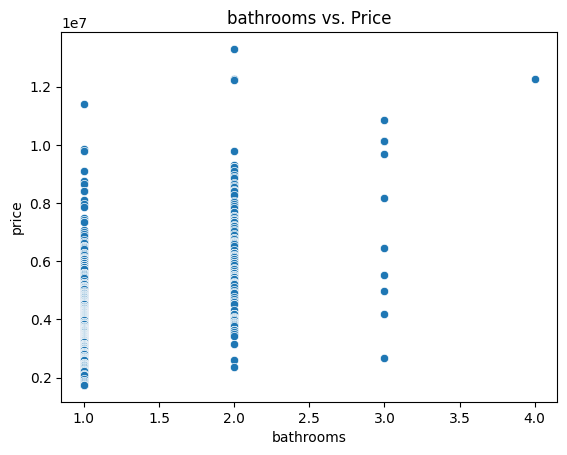

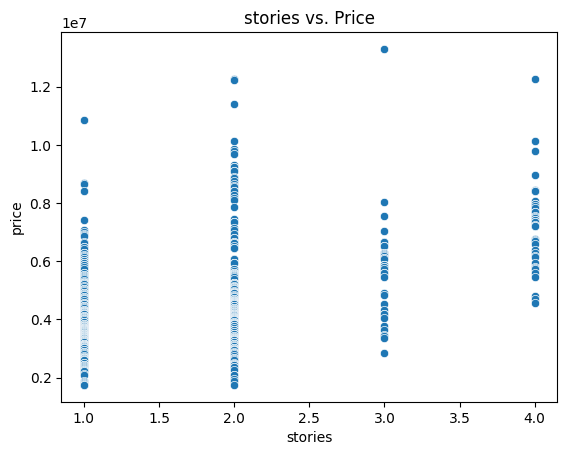

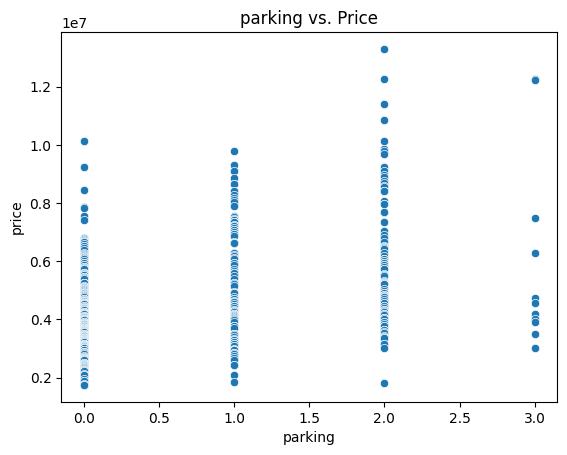

In [10]:
for feature in numerical_features:
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'{feature} vs. Price')
    plt.show()

## Bivariate analysis for categorical features vs. target variable


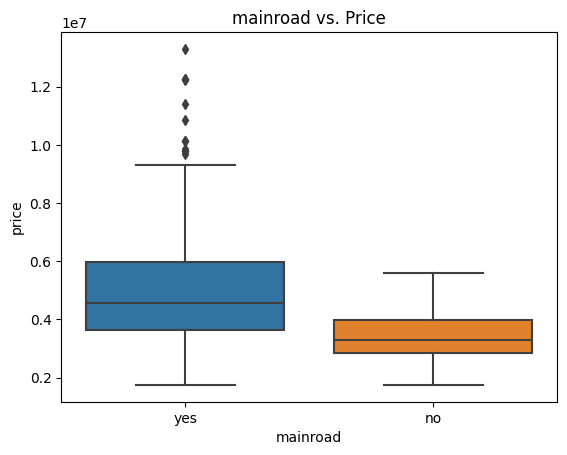

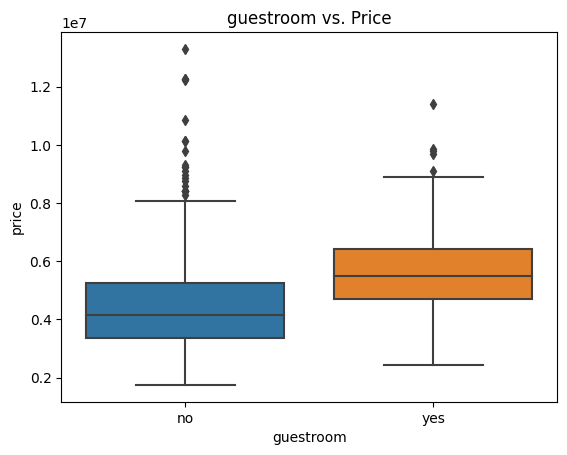

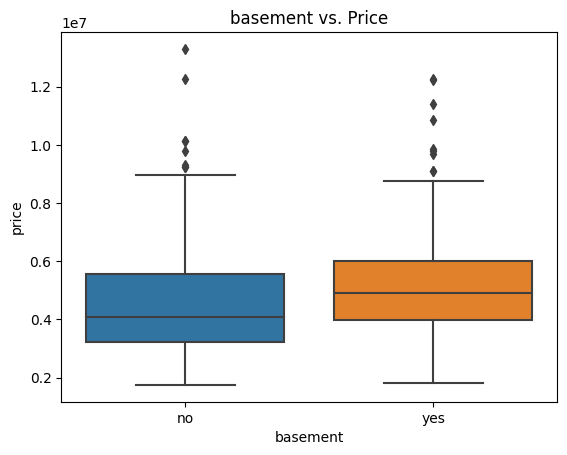

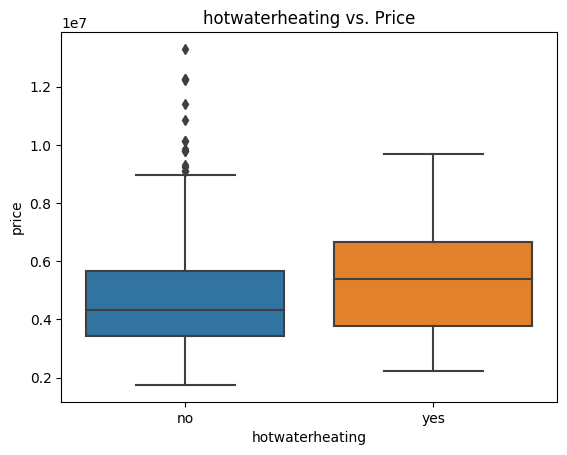

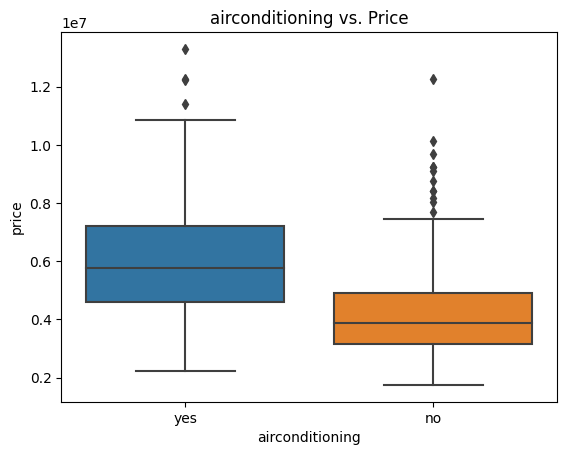

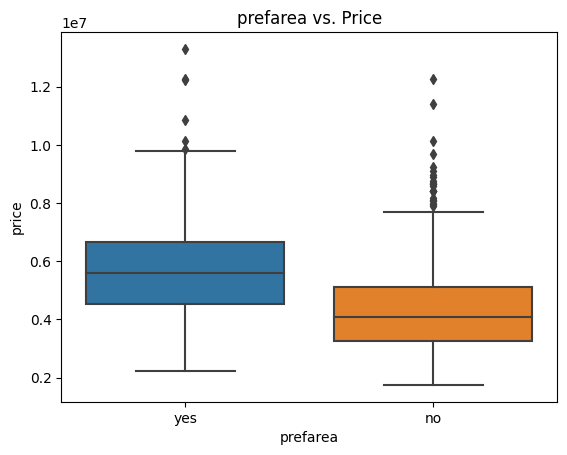

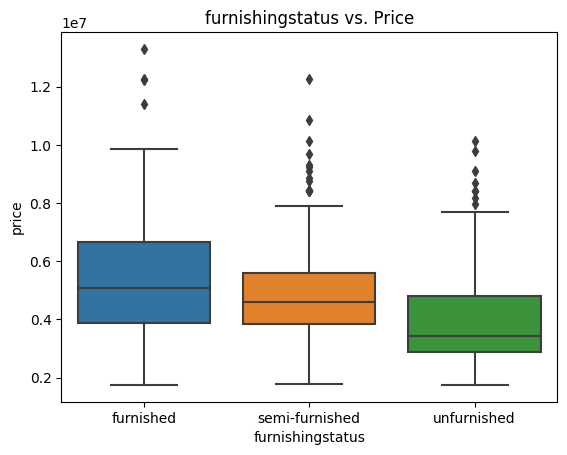

In [11]:
for feature in categorical_features:
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'{feature} vs. Price')
    plt.show()

## Correlation matrix

Reading a Correlation matrix:

* Positive numbers indicate positive correlations, while negative numbers indicate negative correlations.
* The closer the number is to 1 (or -1), the stronger the correlation.
* A number of 0 means there is no correlation between the two variables.



<ipython-input-12-7ca5f81161e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


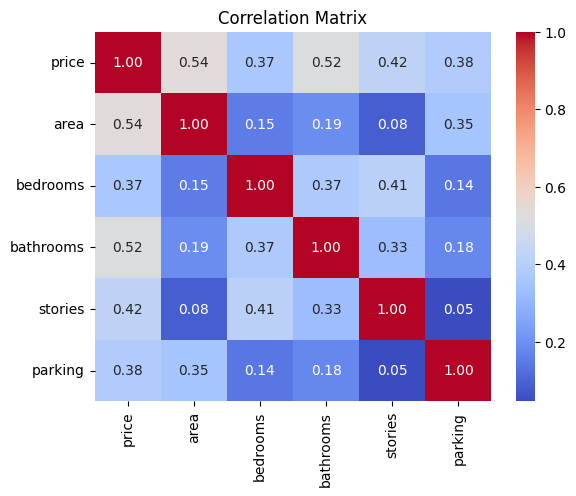

In [12]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Key Observations:

* A correlation of **0.54** between price and area suggests a moderate positive relationship.
  * As the area of a house increases, there is a tendency for the price to also increase.
* A correlation of **0.52** between bathrooms and price also suggests a moderate positive correlation.
  * This implies that as the number of bathrooms in a house increases, there is a tendency for the price to also increase.
* In both cases, the strength of the correlation is considered moderate. The values of 0.54 and 0.52 indicate a positive trend, but they are not extremely high.
  * Keep in mind that **correlation does not imply causation**, and other factors may influence the relationships we observed. In such cases, further analysis and modeling may be required to understand the dynamics and potential predictors affecting housing prices in more detail.

## Count plots for categorical features
Let's explore how the data is distributed across different categories of categorical variables.

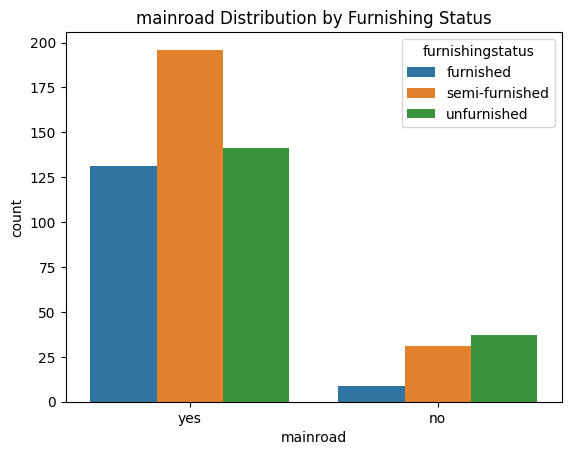

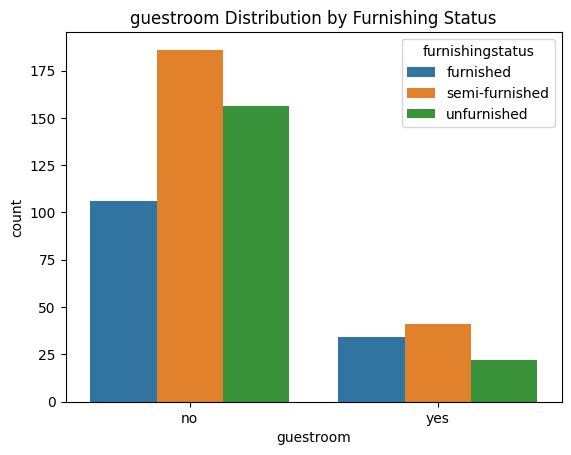

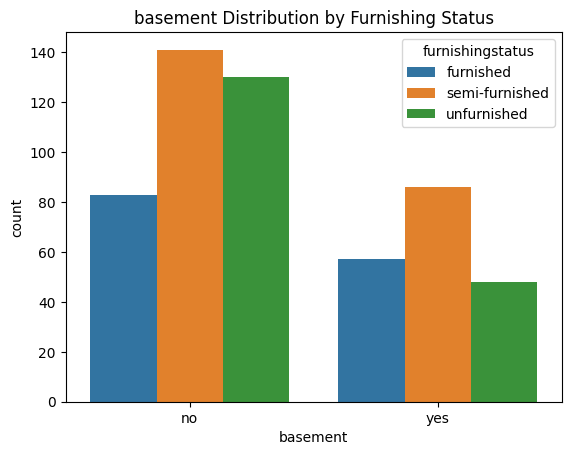

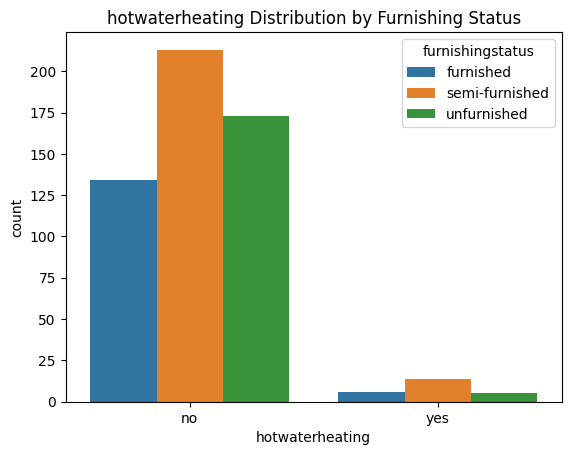

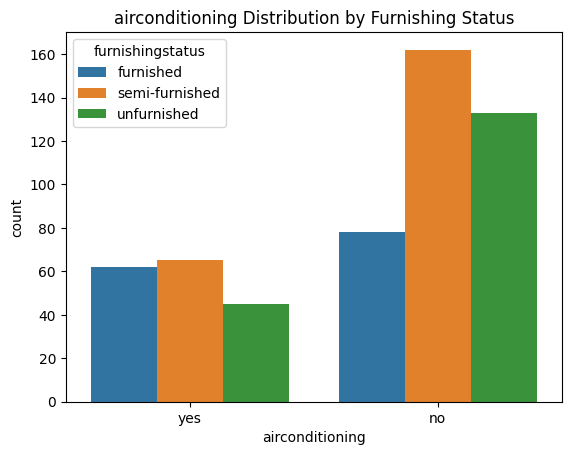

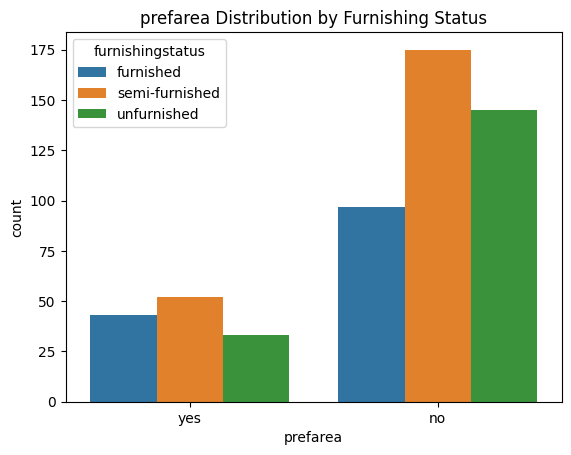

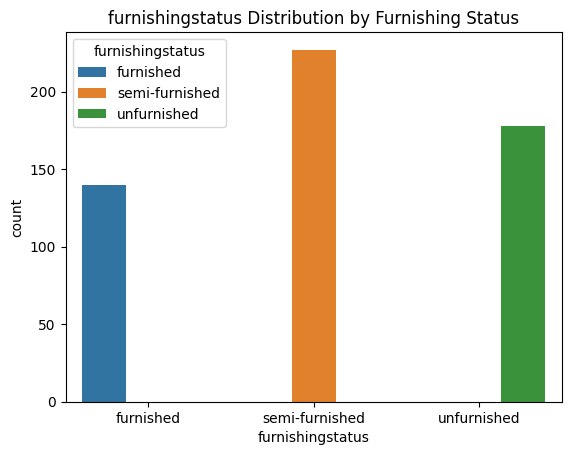

In [13]:
for feature in categorical_features:
    sns.countplot(x=feature, data=df, hue='furnishingstatus')
    plt.title(f'{feature} Distribution by Furnishing Status')
    plt.show()

# Data Preprocessing


In [14]:
#checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Outlier Detection and Treatment:
To identify and handle outliers that might affect the model's performance.


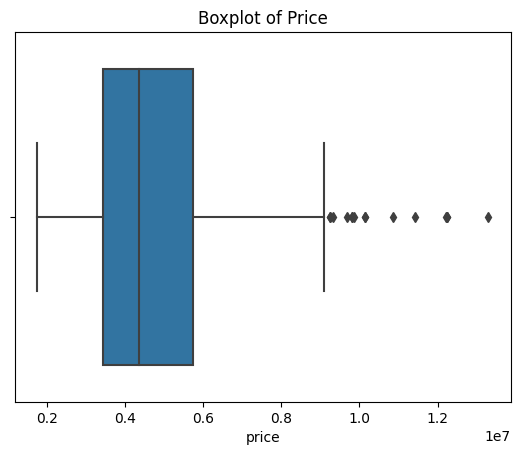

In [15]:
sns.boxplot(x='price', data=df)
plt.title('Boxplot of Price')
plt.show()

In [16]:
# Treatment (Removing outliers using IQR)
# Read more here: https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

 ## Encoding Categorical Variables
* We will convert categorical variables into a numerical format suitable for machine learning models.

* For this I will use a technique called one-hot encoding for nominal variables and label encoding for ordinal variables.

Visit: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f to learn more!

In [17]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

In [18]:
for feature in categorical_columns:
    print(df[feature].value_counts(),end="\n\n")

yes    453
no      77
Name: mainroad, dtype: int64

no     437
yes     93
Name: guestroom, dtype: int64

no     346
yes    184
Name: basement, dtype: int64

no     507
yes     23
Name: hotwaterheating, dtype: int64

no     368
yes    162
Name: airconditioning, dtype: int64

no     412
yes    118
Name: prefarea, dtype: int64

semi-furnished    221
unfurnished       176
furnished         133
Name: furnishingstatus, dtype: int64



In [19]:
# Label encoding categorical features:
encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [20]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [21]:
for feature in categorical_columns:
    print(df[feature].value_counts(),end="\n\n")

1    453
0     77
Name: mainroad, dtype: int64

0    437
1     93
Name: guestroom, dtype: int64

0    346
1    184
Name: basement, dtype: int64

0    507
1     23
Name: hotwaterheating, dtype: int64

0    368
1    162
Name: airconditioning, dtype: int64

0    412
1    118
Name: prefarea, dtype: int64

1    221
2    176
0    133
Name: furnishingstatus, dtype: int64



 ## Feature Scaling:

In [22]:
# Displaying the range of numerical features to determing if scaling is necessary
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{column}: [{df[column].min()}, {df[column].max()}]")

price: [1750000, 9100000]
area: [1650, 15600]
bedrooms: [1, 6]
bathrooms: [1, 3]
stories: [1, 4]
mainroad: [0, 1]
guestroom: [0, 1]
basement: [0, 1]
hotwaterheating: [0, 1]
airconditioning: [0, 1]
parking: [0, 3]
prefarea: [0, 1]
furnishingstatus: [0, 2]


In [23]:
# Extracting the list of numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Scaling numerical variables using fit_transform
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [24]:
# checking the first few rows of the scaled DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,1.000000,0.311828,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1
16,1.000000,0.354839,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,2
17,0.980952,0.491039,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
18,0.971429,0.211470,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0
19,0.966667,0.341935,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1


In [25]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.00000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.387845,0.244553,0.388679,0.130189,0.262893,0.854717,0.175472,0.34717,0.043396,0.305660,0.221384,0.222642,1.081132
std,0.217159,0.148778,0.146103,0.232180,0.287063,0.352719,0.380729,0.47652,0.203940,0.461122,0.281107,0.416413,0.759951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228571,0.136022,0.200000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.250000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.523810,0.334462,0.400000,0.000000,0.333333,1.000000,0.000000,1.00000,0.000000,1.000000,0.333333,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000


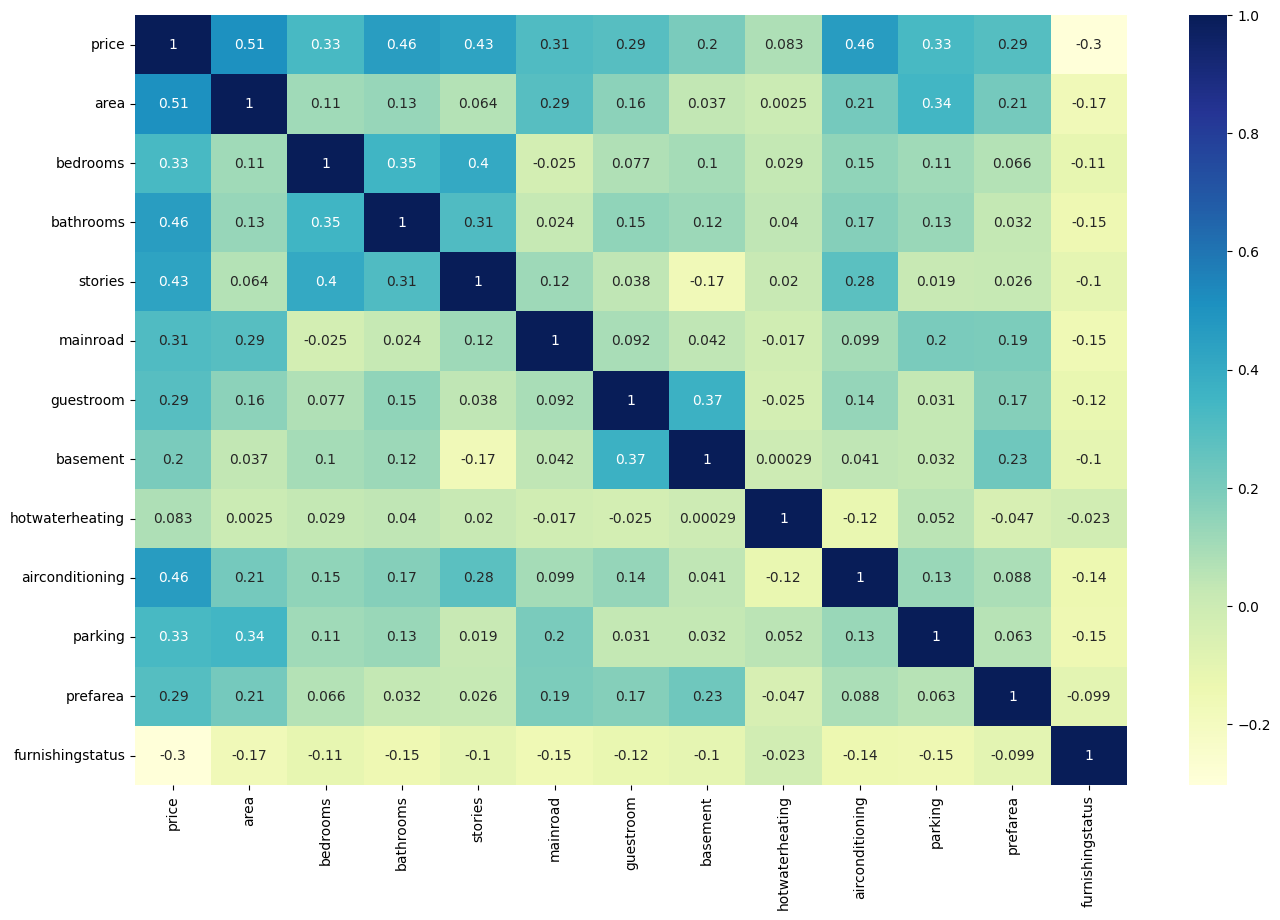

In [26]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Train-Test Split:
* We will Split the dataset into training and testing sets to assess model performance.
* Split percentage - Train: 80%, Test: 20%

In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,1.000000,0.311828,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1
16,1.000000,0.354839,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,2
17,0.980952,0.491039,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
18,0.971429,0.211470,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0
19,0.966667,0.341935,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1


In [28]:
X = df.drop(['price'],axis=1).values # Features
y = df['price'] # Target variable

In [29]:
X

array([[0.31182796, 0.6       , 0.        , ..., 0.66666667, 0.        ,
        1.        ],
       [0.35483871, 0.6       , 0.5       , ..., 0.33333333, 1.        ,
        2.        ],
       [0.49103943, 0.4       , 0.5       , ..., 0.66666667, 0.        ,
        0.        ],
       ...,
       [0.14121864, 0.2       , 0.        , ..., 0.        , 0.        ,
        2.        ],
       [0.09032258, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15770609, 0.4       , 0.        , ..., 0.        , 0.        ,
        2.        ]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#df.to_csv('preprocessed_data.csv', index=False)

# **Modelling**

## **Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.6609158761625455

In [33]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.02173389683147151
R-squared: 0.6609158761625455
Mean Absolute Error: 0.10819515889575024


What do these results mean?
1. **Mean Squared Error**:
  * A lower MSE indicates better model performance, and **0.0217** is relatively low, suggesting that, on average, the model's predictions are close to the actual values.

2. **R- Squared**:
  * The R-squared value is approximately **0.6609**, which means that around **66.09%** of the variance in housing prices is explained by the linear regression model.

3. **Mean Absolute Error (MAE)**:
  * MAE is approximately **0.1082**, representing the average absolute error in predicting housing prices.
  * A lower MAE indicates better accuracy, and **0.1082** suggests that, on average, the model's predictions are close to the actual values.

## **Elastic Net Regression**:
- Elastic Net combines L1 and L2 regularization, providing a balance between the Lasso and Ridge regression techniques.
- Let's see how it performs

In [35]:
from sklearn.linear_model import ElasticNet

# Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Training the model
elastic_net_model.fit(X_train, y_train)

# Predictions on the test set
elastic_net_y_pred = elastic_net_model.predict(X_test)

# Model evaluation
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
elastic_net_mae = mean_absolute_error(y_test, elastic_net_y_pred)

print(f'Elastic Net Regression Mean Squared Error: {elastic_net_mse}')
print(f'Elastic Net Regression R-squared: {elastic_net_r2}')
print(f'Elastic Net Regression Mean Absolute Error: {elastic_net_mae}')

Elastic Net Regression Mean Squared Error: 0.06460665057456436
Elastic Net Regression R-squared: -0.007968781393423496
Elastic Net Regression Mean Absolute Error: 0.2067876570208005


## What do these results mean?
1. **Mean Squared Error**:
  *  MSE is approximately **0.0646**. Since MSE is a squared metric, lower values are better. The model is making predictions with a moderate level of error on average.

2. **R- Squared**:
  * R-squared value is approximately **-0.008**. A negative value indicates that the model performs worse than a simple mean. In this case, the model is not capturing the variance well, and it might be underfitting the data.

3. **Mean Absolute Error (MAE)**:
  * The MAE is approximately **0.2068**. MAE is an absolute metric, and lower values are better. The model, on average, has an absolute error of approximately 0.207

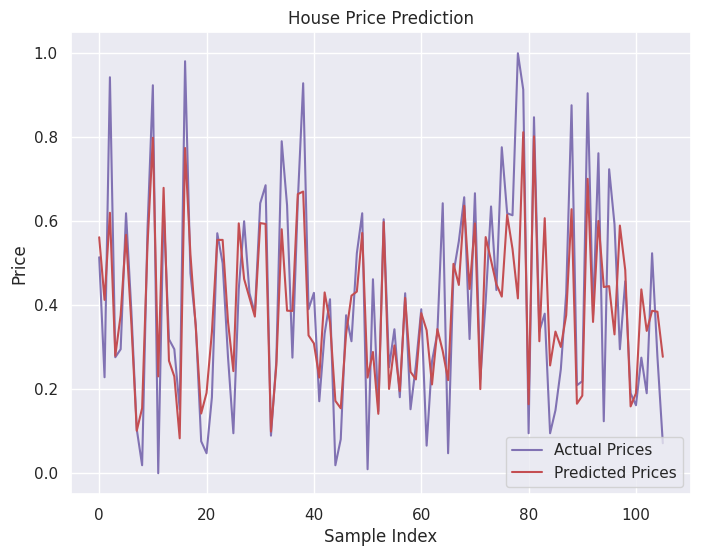

In [36]:
import seaborn as sns
sns.set()
plt.figure(figsize=(8, 6))

# Plotting actual prices
plt.plot(np.arange(len(y_test)), y_test, label='Actual Prices', color='m')

# Plotting predicted prices
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Prices', color='r')

plt.title('House Price Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

The predicted housing price displayed above is based on the linear regression model's output (y_pred) as it demonstrated better performance in our analysis.